<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, LassoCV
%matplotlib inline


In [136]:
# checked the parks data, and it had ratings, acreage and district. Unfortunately after checking it out,
# the ratings per park were generally consistent at around 8-9 out of a score of 10, so any type of
# linear regression would not have been better than guessing the mean rating

# checked a number of other datasets which had no numeric values, or 
# no linkable values to other datasets

# as a result, tried to link the following datasets together by zip code:
# fire incidents
# eviction notices
# business permits
# park count

#unfortunately there's only 23 zip codes, so the maximum amount of data points possible is 
#23, and some of the data didnt have zip codes coded, so there was some data loss when 
# assembling all the data together.

In [137]:
# -----------------------------------------------------------------

# Hypothesis - is that there is correlation by zip code between
# fires
# evictions
# business Permits
# and parks
#--------------------------------------------------------------------

In [138]:
# EDA : Business Permits
# This is checking the business permit data for something to regress
# will group by Zip code because its a common field

file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/business_permits/sf_business_locations_permits.csv'
biz_info = pd.read_csv(file_path)
print biz_info.info()
biz_info.head()
biz_info['Zipcode'] =biz_info['Zip_Code']
bizct_zip = biz_info.groupby('Zipcode')[['Location_ID']].count()
bizct_zip.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180974 entries, 0 to 180973
Data columns (total 15 columns):
Location_ID                180974 non-null object
Business_Account_Number    180974 non-null int64
Ownership_Name             180973 non-null object
DBA Name                   180959 non-null object
Street_Address             180969 non-null object
City                       180702 non-null object
State                      180290 non-null object
Zip_Code                   180882 non-null float64
Business_Start_Date        180974 non-null object
Business_End_Date          29727 non-null object
Location Start Date        180974 non-null object
Location_End_Date          42201 non-null object
Mail_Address               180972 non-null object
Mail_City_State_Zip        180973 non-null object
Business_Location          180491 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 20.7+ MB
None


In [139]:
# EDA : Park Data - counts by zip code
# link all things 
# park data 
file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/parks/park_info.csv'
park_info = pd.read_csv(file_path)
#print park_info.head()
#print park_info.shape

parkct_zip = park_info.groupby('Zipcode')[['ParkID']].count()
parkct_zip.reset_index(inplace=True)

# EDA : Fire incident Data - counts by zip code
# 
file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/fire_data/fire_incidents.csv'
fire = pd.read_csv(file_path)
fire['YEAR'] = fire['Incident Date'].map(lambda x: x.split('/')[-1])
# print fire.shape
print fire.info()
# print fire.head()

firect_zip = fire.groupby(['Zipcode','YEAR'])['Exposure Number','Incident Number'].count()
firect_zip.reset_index(inplace=True)

# EDA : Evictions Data - counts by zip code
#
file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/evictions/sf_eviction_notices.csv'
evictions = pd.read_csv(file_path)
evictions['Zipcode'] = evictions['Eviction Notice Source Zipcode']
evictions['YEAR'] = evictions['File Date'].map(lambda x: x.split('/')[-1])
evictionct_zip = evictions.groupby('Zipcode')[['Eviction ID']].count()
evictionct_zip.reset_index(inplace=True)
print 'complete'


/Users/tlee010/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 64 columns):
Incident Number                                 406736 non-null int64
Exposure Number                                 406736 non-null int64
Address                                         406633 non-null object
Incident Date                                   406736 non-null object
Call Number                                     406736 non-null int64
Alarm DtTm                                      406736 non-null object
Arrival DtTm                                    406718 non-null object
Close DtTm                                      406736 non-null object
City                                            405509 non-null object
Zipcode                                         334349 non-null float64
Battalion                                       406736 non-null object
Station Area                                    406207 non-null object
Box                                    

/Users/tlee010/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
#evictions.head()
evictionct_zip.head(5)

,Zipcode,Eviction ID
0,9,2
1,94,1
2,941,9
3,9411,1
4,9412,1


In [141]:
print firect_zip.head(5)
firect_summary_zip = firect_zip.groupby('Zipcode')[['Incident Number']].mean()
print firect_summary_zip.head(5)
firect_summary_zip.reset_index(inplace=True)

   Zipcode  YEAR  Exposure Number  Incident Number
0  94102.0  2003             2583             2583
1  94102.0  2004             2338             2338
2  94102.0  2005             2462             2462
3  94102.0  2006             2287             2287
4  94102.0  2007             2456             2456
         Incident Number
Zipcode                 
94102.0      2524.000000
94103.0      2751.857143
94104.0       317.928571
94105.0       878.928571
94107.0      1180.500000


In [142]:
parkct_zip.head(5)

,Zipcode,ParkID
0,94044.0,1
1,94102.0,11
2,94103.0,3
3,94105.0,1
4,94107.0,8


In [143]:
# Merging all the datasets together so they can be compared to each other
# 
# 

working = pd.DataFrame()
working = evictionct_zip.copy()
working2 = working.merge(firect_summary_zip, how='inner',on='Zipcode')
working3 = working2.merge(bizct_zip, how = 'inner', on = 'Zipcode')
master = working3.merge(parkct_zip, how='inner',on='Zipcode')

master.columns = ['Zipcode','Eviction_ct','Fire_ct','Biz_permit_ct','Park_ct']
print master.head()
print master.shape
print master.isnull().sum()


  Zipcode  Eviction_ct      Fire_ct  Biz_permit_ct  Park_ct
0   94102          170  2524.000000           7723       11
1   94103          210  2751.857143          10558        3
2   94105            4   878.928571           6055        1
3   94107           70  1180.500000           9138        8
4   94108           50   840.642857           5455        7
(23, 5)
Zipcode          0
Eviction_ct      0
Fire_ct          0
Biz_permit_ct    0
Park_ct          0
dtype: int64


  Zipcode  Eviction_ct      Fire_ct  Biz_permit_ct  Park_ct
0   94102          170  2524.000000           7723       11
1   94103          210  2751.857143          10558        3
2   94105            4   878.928571           6055        1
3   94107           70  1180.500000           9138        8
4   94108           50   840.642857           5455        7


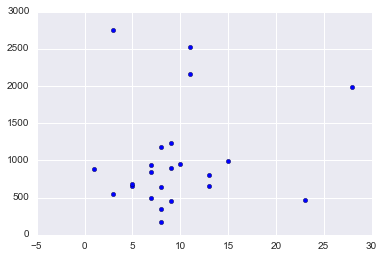

In [144]:
print master.head(5)
plt.scatter(master['Park_ct'], master['Fire_ct'])


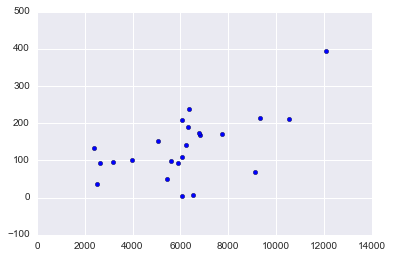

In [145]:
plt.scatter(master['Biz_permit_ct'], master['Eviction_ct'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


(17,) <class 'pandas.core.series.Series'> (17,) <class 'pandas.core.series.Series'>
0.0930526702137
-0.943347031518 [ 0.24330012 -1.33013751 -1.74320371]


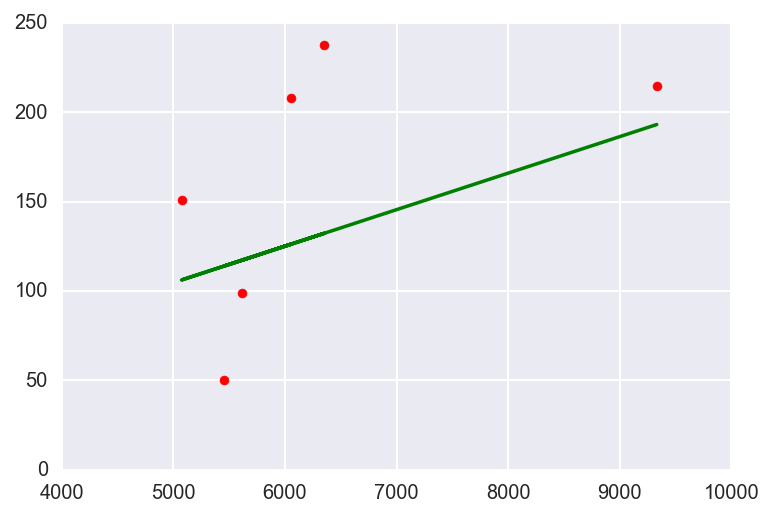

In [293]:
#1 will choose one of the combinations and try and do a linear regression
#
# count of Biz_Permit  vs. count of Eviction_ct per zip code
# expect that there will be higher evictions in denser zip codes

lm = LinearRegression()
X = master['Biz_permit_ct']
y = master['Eviction_ct']

#2

#3 - make a linear model
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.25)
print X_train.shape, type(X_train), y_train.shape, type(X_train)
X_modeling = X_train.reshape(len(X_train),1)
model = lm.fit(X_modeling,y_train)

#4 - check the model
X_modeling_test = X_test.reshape(len(X_test),1)
y_hat = model.predict(X_modeling_test)
plt.plot(X_modeling_test,y_hat, color = 'green')
plt.scatter(X_modeling_test,y_test,color = 'red')
score = model.score(X_modeling_test,y_test)
print score

# the scores are wildly different because of the smaller dataset. 
# in addition, cross validating and sample testing makes the small dataset even smaller
# when the sample testing is done, the variance between the datas is exaggerated,
# resulting in very different scores when cross validating


#5 - charts below


score = cross_val_score(lm,X.reshape(len(X),1),y, cv=3)
print score.mean(), score
# Number of Business Permits vs. # of Evictions. 


In [294]:
#6 There's a correlation between number of business permits and the number of evictions by zip code
#
# This makes intuitive sense, as businesses are usually clustered in high rent areas 
# with high turn over. This is compared and linked together at a zip code area, which
# results in fewer datapoints (23). Ideally a future study would be done on a neighborhood level
# underneath the zip codes



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
# R^2 can only be between 0 and 1 when measured against the training data. The R2 score will tell
# how close the predictions are to the actual values by a squared value
#
# when introducing new data, sometimes there's an unexpected outlier, or somethign outside the
# trained model. as a result, the difference would be so large that there would be a negative error
# it means that it is really wrong. And as a result, the model is worse than just using the baseline mean

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [146]:

#since i already did multiple joins before for problem #1 & 2, i will use a single dataset for prob 3
# will look at assessor data, and try to 

file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/assessor_office/assessor_data_2010_2011.csv'
re_stuff = pd.read_csv(file_path)
#print re_stuff.info()

#RP1FXTVAL = fixture value
#RP1IMPVAL = improvement value
#RP1LNDVAL = Land value
#RP1PPTVAL = personal value
re_stuff['TOTAL_VALUE'] =re_stuff.apply(lambda x: x.RP1FXTVAL + x.RP1IMPVAL + x.RP1LNDVAL +x.RP1PPTVAL,axis=1) 

# cleaning - exclude any blanks
re_subcol = re_stuff[(re_stuff['SQFT']!=0) &(re_stuff['ROOMS']!=0)&(re_stuff['LAREA']!=0)&(re_stuff['TOTAL_VALUE']!=0)][['ROOMS','SQFT','LAREA','TOTAL_VALUE']]

# keeping sample size smaller to ensure that the lasso and ridge processes run
re_subset = re_subcol.head(50000)
print re_subset.head(5)



/Users/tlee010/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    ROOMS    SQFT     LAREA  TOTAL_VALUE
9      36  198525  57750.00     44382523
10     19   24627  18906.25     22059143
11      9    7073  63020.38       973585
12      5    6800   6800.00      2089261
14      2    4000  11000.00      1449630


,ROOMS,SQFT,ROOMS,LAREA,TOTAL_VALUE
118407,31,7000,31,2870.0,134


In [147]:
# data cleaning and assembly
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn import grid_search
import matplotlib.pyplot as plt


import patsy

formula = 'TOTAL_VALUE ~ ROOMS + SQFT + ROOMS + LAREA-1'
y, X = patsy.dmatrices(formula, re_subset)
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(40000, 3) (10000, 3) (40000, 1) (10000, 1)


In [155]:
#------------------------------ LINEAR --------------------------------#
lm = LinearRegression()
lmmodel = lm.fit(X_train,y_train)
score = lm.score(X_train,y_train)
print score
CVscore = cross_val_score(lm,X_train,y_train, cv=5)
y_CVS = cross_val_predict(lm,X_test,y_test, cv=5)
print np.mean(CVscore), CVscore

0.5330648395
0.45327455837 [ 0.39468461  0.36836374  0.60102456  0.58145685  0.32084303]


In [157]:

#------------------------------ LASSO --------------------------------#
lasso = Lasso()
lassoparams = {
        'alpha': [1, 2, 5, 10, 20,50,100,1000,5000,10000,50000,100000,500000, 1000000,5000000]
}
lassoest = grid_search.GridSearchCV(lasso, lassoparams, cv=5)
results = lassoest.fit(X_train,y_train)
print results.best_params_
#{'alpha': 1000000}

lassoCV = LassoCV(alphas = [5000],cv=5)
lassoCVml = lassoCV.fit(X_train,np.ravel(y_train))
print lassoCVml.alpha_, lassoCVml.score(X_test,y_test)
print lassoCVml.coef_
y_lassoCV = lassoCVml.predict(X_test)



{'alpha': 5000}
5000 0.656172941066
[  670050.49875117  2253619.80723642        0.        ]


In [158]:

#------------------------------ RIDGE --------------------------------#
ridge = Ridge()
ridgeparams = {
        'alpha': [0.1, 1, 10, 100, 1000, 10000,50000, 100000, 500000, 1000000,10000000]
}
ridgeest = grid_search.GridSearchCV(ridge, ridgeparams, cv=5)
results = ridgeest.fit(X_train,y_train)
#ridgeCV = RidgeCV()
print results.best_params_

ridgeCV = RidgeCV(alphas=[1000], cv=5)
ridgeCVmodel = ridgeCV.fit(X_train,np.ravel(y_train))
print ridgeCVmodel.score(X_test,y_test)
print ridgeCVmodel.coef_
y_ridgeCV = ridgeCVmodel.predict(X_test)

{'alpha': 1000}
0.644017412655
[  719452.5567867   2157978.63570129     3018.08305062]


In [161]:

#------------------------------ Elasticnet --------------------------------#
# Initialize gridsearch
elastic = ElasticNet() 
elasticparams = {
        'alpha': [0.001, 0.01, 0.1, 1, 10 ,100, 1000, 10000, 100000, 1000000]
        , 'l1_ratio': [.01, .2,.3,.4,.5,.6,.7,.8,.9,.99]
}
enetest = grid_search.GridSearchCV(elastic, elasticparams, cv=5)
results = enetest.fit(X_train,y_train)
print results.best_params_
#{'alpha': 0.1, 'l1_ratio': 0.01}

elasticCV = ElasticNetCV(alphas=[10],l1_ratio=0.99)
elasticCVmodel = elasticCV.fit(X_train,np.ravel(y_train))
print elasticCVmodel.score(X_test,y_test)

y_elasticCV = elasticCVmodel.predict(X_test)



{'alpha': 10, 'l1_ratio': 0.99}
0.611512216502


In [ ]:
#==================================================
# summary
# baseline:
# linear: 0.45
# Lasso: 0.65
# ridge: 0.644
# elastic CV: 0.61
#==================================================

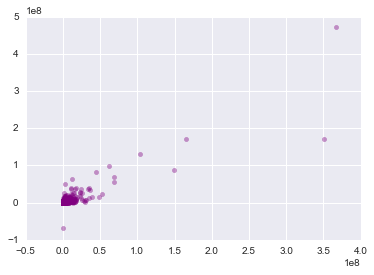

In [162]:
%matplotlib inline
plt.scatter(y_test,y_CVS,color = 'purple', alpha=0.4)

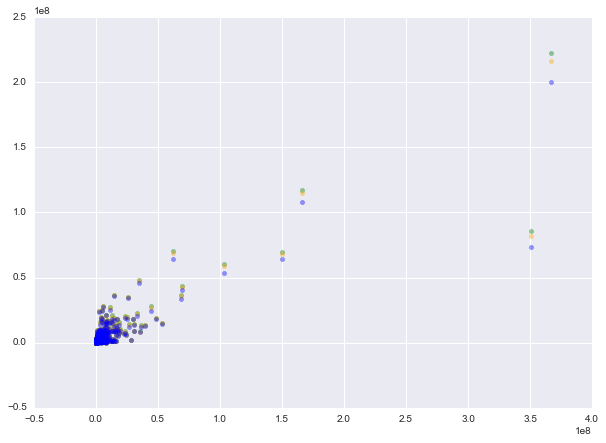

In [163]:

fig = plt.figure(figsize =(10,7))

plt.scatter(y_test,y_lassoCV,color = 'green', alpha=0.4)
plt.scatter(y_test,y_ridgeCV,color = 'orange', alpha=0.4)
plt.scatter(y_test,y_elasticCV,color = 'blue' , alpha=0.4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 



In [178]:
# --- looking at the (Target) number of business violations recorded in the yelp dataset
# --- will look at population density, building permit
# --- business count
# --- overall education "card available"
# --- will see if a correlation can be drawn between these factors and 


#part 1 --- EDA
file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/yelp_sf_healthcode_violations/neighborhood_legend.csv'
yelp_nbhood = pd.read_csv(file_path)

yelp_nbhood['pop'] = yelp_nbhood.Population.map(lambda x: int(x.replace(',','')))
yelp_nbhood['neighborhood'] = yelp_nbhood['Neighborhood']
yelp_grp_nbhood = yelp_nbhood.groupby('neighborhood')[['pop']].sum()
yelp_grp_nbhood.reset_index(inplace=True)

file_path = '/Users/tlee010/desktop/san_francisco/san_francisco/yelp_sf_healthcode_violations/violations_parsed_words.csv'
yelp_data = pd.read_csv(file_path)
#print yelp_data.info()
#print yelp_data.head(10)

#print yelp_data.columns.values
#print yelp_data.population.value_counts()
subcol = yelp_data[['score','neighborhood','days_since_first_violation', 'violation_count','business_count','building permit','card available','cleaned','facilities equipment']]

merged = subcol.merge(yelp_grp_nbhood, on='neighborhood', how='left')
del merged['neighborhood']
merged.head(10)



,score,days_since_first_violation,violation_count,business_count,building permit,card available,cleaned,facilities equipment,pop
0,92.0,0.0,1.0,112.0,0,0,0,0,13000
1,92.0,0.0,1.0,112.0,0,0,0,0,13000
2,92.0,0.0,1.0,112.0,0,0,0,0,13000
3,94.0,196.0,2.0,112.0,0,0,0,0,13000
4,94.0,196.0,2.0,112.0,0,0,0,0,13000
5,100.0,0.0,1.0,112.0,0,0,0,0,13000
6,96.0,206.0,2.0,112.0,0,0,1,0,13000
7,96.0,206.0,2.0,112.0,0,0,0,0,13000
8,96.0,371.0,3.0,112.0,0,0,0,0,13000
9,96.0,844.0,4.0,112.0,0,0,0,0,13000


In [179]:
#part 1a --- cutting out excessive columns

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
shrinkcols =[x for x in subcol.columns if x in ['score','days_since_first_violation','violation_count','business_count','pop']]
subcol.loc[:,shrinkcols] = scaler.fit_transform(subcol.loc[:,shrinkcols])
print subcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32455 entries, 0 to 32454
Data columns (total 9 columns):
score                         32455 non-null float64
neighborhood                  32455 non-null object
days_since_first_violation    32455 non-null float64
violation_count               32455 non-null float64
business_count                32455 non-null float64
building permit               32455 non-null int64
card available                32455 non-null int64
cleaned                       32455 non-null int64
facilities equipment          32455 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.2+ MB
None


In [180]:
#part 2 splitting targets y and features X

import patsy
# predict: violation_count
# features, , score, count, days since first violation, neighborhood to join, building_permit, card_available, cleaned, facilities equipment
merged.columns = [x.replace(' ','_') for x in merged.columns]
formula = 'violation_count ~ pop + days_since_first_violation + score + business_count + building_permit + card_available + cleaned + facilities_equipment'
print merged.info()

y,X = patsy.dmatrices(formula,merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32455 entries, 0 to 32454
Data columns (total 9 columns):
score                         32455 non-null float64
days_since_first_violation    32455 non-null float64
violation_count               32455 non-null float64
business_count                32455 non-null float64
building_permit               32455 non-null int64
card_available                32455 non-null int64
cleaned                       32455 non-null int64
facilities_equipment          32455 non-null int64
pop                           32455 non-null int64
dtypes: float64(4), int64(5)
memory usage: 2.5 MB
None


In [181]:
#part 3 splitting training and test sets

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.grid_search import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(25964, 9) (6491, 9) (25964, 1) (6491, 1)


In [182]:
#part 4 modeling

# ------------------------ LINEAR REGRESSION -----------------------------
lm = LinearRegression()
lmmodel = lm.fit(X_train,y_train)
score = lm.score(X_train,y_train)
print score
CVscore = cross_val_score(lm,X_test,y_test, cv=5)
y_CVS = cross_val_predict(lm,X_test,y_test, cv=5)
print np.mean(CVscore), CVscore

0.82059013852
0.816221417327 [ 0.81638062  0.80786639  0.81640269  0.82484079  0.81561659]


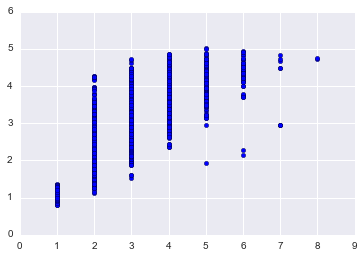

In [183]:
plt.scatter(y_test,y_CVS)

In [184]:
#part 4 modeling

#------------------------------ RIDGE --------------------------------#
ridge = Ridge()
ridgeparams = {
        'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,50000, 100000, 500000, 1000000,10000000]
}
ridgeest = GridSearchCV(ridge, ridgeparams, cv=5)
results = ridgeest.fit(X_train,y_train)
#ridgeCV = RidgeCV()
print results.best_params_

ridgeCV = RidgeCV(alphas=[10000], cv=5)
ridgeCVmodel = ridgeCV.fit(X_train,np.ravel(y_train))
print ridgeCVmodel.score(X_test,y_test)
print ridgeCVmodel.coef_
y_ridgeCV = ridgeCVmodel.predict(X_test)

{'alpha': 50000}
0.817024844031
[  0.00000000e+00   1.18617395e-06   3.42810471e-03   8.12880393e-03
  -1.69208174e-04   1.81808085e-04   1.01515654e-03  -6.89193032e-04
   1.84139004e-05]


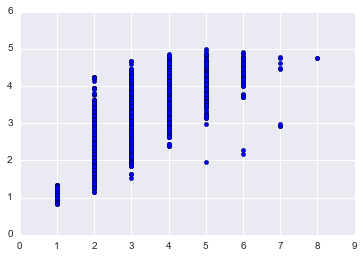

In [185]:
plt.scatter(y_test,y_ridgeCV)

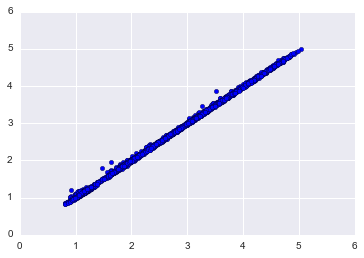

In [186]:
plt.scatter(y_CVS,y_ridgeCV) # very little variance between the Linear and Ridge predicted models 

In [ ]:
# conclusions: 

# there is a strong correlation between the violation count and some of our features
# the R^2 score is high and the the results and corresponding plots between the two datasets don't vary alot. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

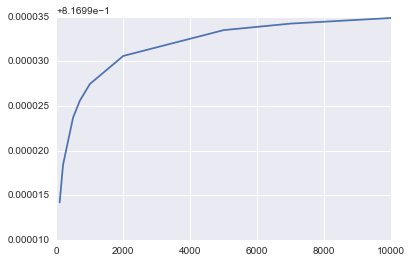

In [191]:
def get_score(alpha):
    ridgeCV = RidgeCV(alphas=[alpha], cv=5)
    ridgeCVmodel = ridgeCV.fit(X_train,np.ravel(y_train))
    return ridgeCVmodel.score(X_test,y_test)

ridgealpha_x = []
score_y = []

for alp in [100,200,500,700,1000,2000,5000,7000,10000]:
    ridgealpha_x.append(alp)
    score_y.append(get_score(alp))

plt.plot(ridgealpha_x,score_y)

# note - the chart axis is very small. But shows that the alpha flattens out around 100000
# the 0.000035 is plus 0.817 which is the standard score (consistent for this dataset)

0.817024216643
[0.81700418458139512, 0.81700839094913369, 0.81701368523960272, 0.8170155617998176, 0.81701744471044857, 0.81702059604187938, 0.81702348623079557, 0.81702421664250025, 0.81702484403061248]


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?